In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Data Exploration

In [5]:
dataset = datasets.load_breast_cancer()
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print (dataset["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [7]:
col_names = dataset.feature_names
breast_cancer = pd.DataFrame(dataset.data, columns=col_names)
breast_cancer["diagnosis"] = dataset["target"]
breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


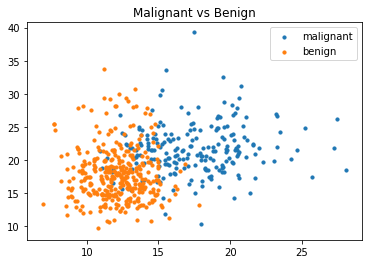

In [8]:
X = breast_cancer.iloc[:, :-1]
y = breast_cancer.iloc[:, -1]

malignant = breast_cancer.loc[y==0]
benign = breast_cancer.loc[y==1]

plt.scatter(malignant.iloc[:, 0], malignant.iloc[:, 1], s=10, label='malignant')
plt.scatter(benign.iloc[:, 0], benign.iloc[:, 1], s=10, label='benign')
plt.title("Malignant vs Benign")
plt.legend()
plt.show()


diagnosis
0    [[AxesSubplot(0.125,0.779333;0.125x0.100667), ...
1    [[AxesSubplot(0.125,0.779333;0.125x0.100667), ...
dtype: object

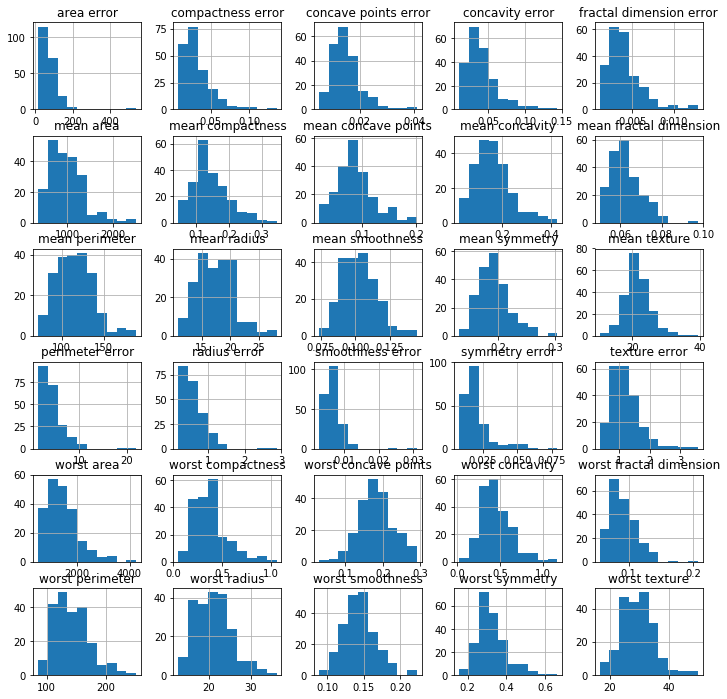

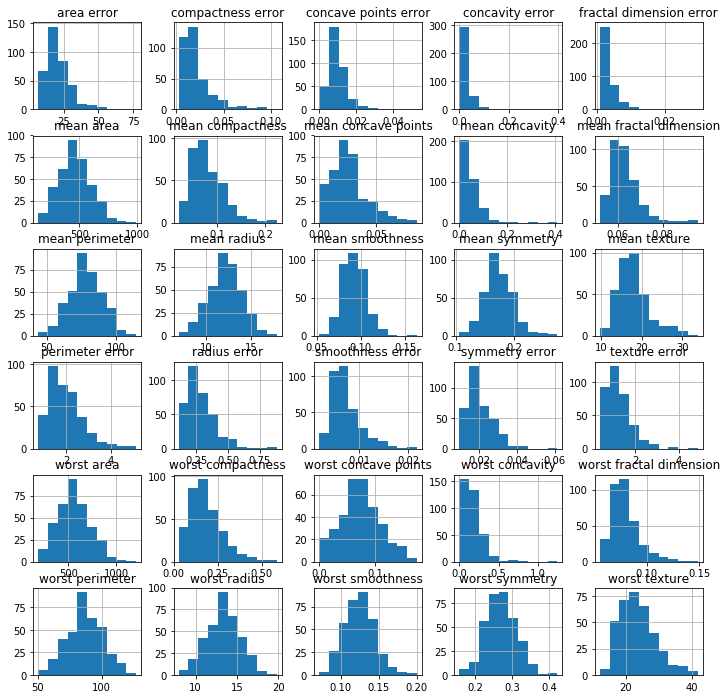

In [9]:
breast_cancer.groupby('diagnosis').hist(figsize=(12, 12))

## Data Preprocessing

### Checking for missing values

In [10]:
breast_cancer.isnull().sum()
breast_cancer.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

### Data Conversion

In [11]:
# Not needed since the target variable (diagnosis) is already converted
# Just for practice
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(breast_cancer['diagnosis'])

## Training / Testing

In [12]:
#Split the data

X = breast_cancer.iloc[:, 0:30]
y = breast_cancer.iloc[:, 30:31]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("X_train shape -> {}".format(X_train.shape))
print("y_train shape -> {}".format(y_train.shape))
print("X_test shape -> {}".format(X_test.shape))
print("y_test shape -> {}".format(y_test.shape))

X_train shape -> (455, 30)
y_train shape -> (455, 1)
X_test shape -> (114, 30)
y_test shape -> (114, 1)


In [13]:
#Transform data so it's normally distributed

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
logistic_regression = LogisticRegression(solver='lbfgs')
logistic_regression.fit(X_train, y_train.values.ravel())
predictions = logistic_regression.predict(X_test)

## Results

In [15]:
print("Training subset accuracy: {}".format(logistic_regression.score(X_train, y_train)))
print("Testing subset accuracy: {}".format(logistic_regression.score(X_test, y_test)))

Training subset accuracy: 0.9868131868131869
Testing subset accuracy: 0.9736842105263158


In [16]:
# params = logistic_regression.coef_
# x_vals = [np.min(X.iloc[:, 1]), np.max(X.iloc[:, 2])]
# y_vals = - (params[0][0] + np.dot(params[0][1], x_values)) / params[0][2]

# plt.scatter(malignant.iloc[:, 0], malignant.iloc[:, 1], s=10, label='malignant')
# plt.scatter(benign.iloc[:, 0], benign.iloc[:, 1], s=10, label='benign')
# plt.plot(x_vals, y_vals, label="Decision Boundary")
# plt.title("Malignant vs Benign")
# plt.legend()
# plt.show()